In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
random_seed = 42

In [3]:
breast_cancer = datasets.load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

y = df['mean area']
x = df.drop(columns=['mean area'])

df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_correlacao = df.corr()['mean area'].drop('mean area')

features_relevantes = df_correlacao[df_correlacao > 0.7]

features_relevantes

mean radius             0.987357
mean perimeter          0.986507
mean concave points     0.823269
radius error            0.732562
perimeter error         0.726628
area error              0.800086
worst radius            0.962746
worst perimeter         0.959120
worst area              0.959213
worst concave points    0.722017
Name: mean area, dtype: float64

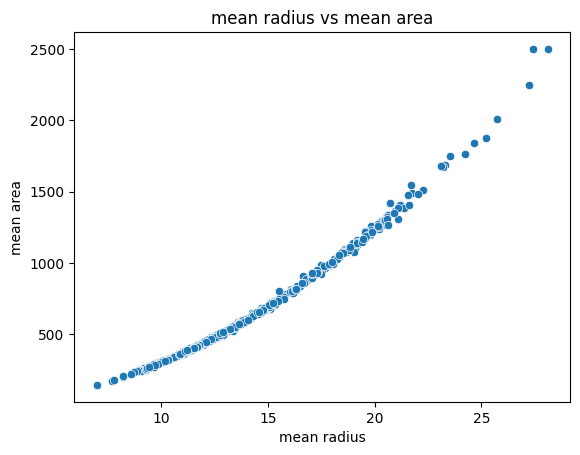

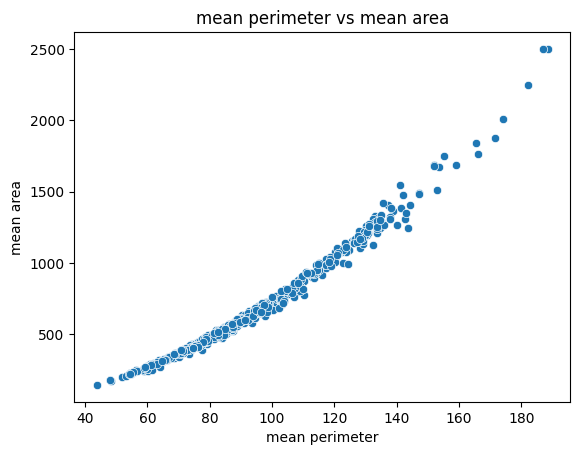

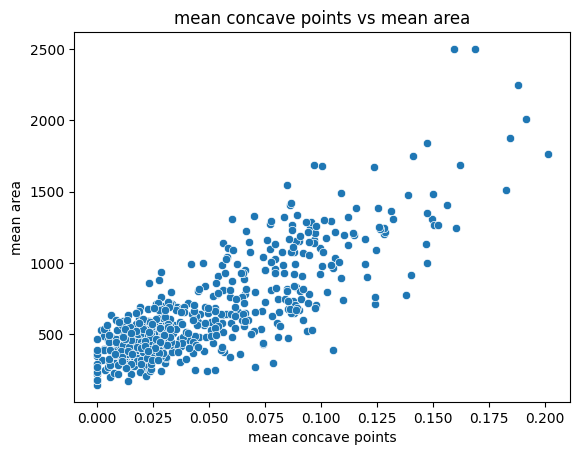

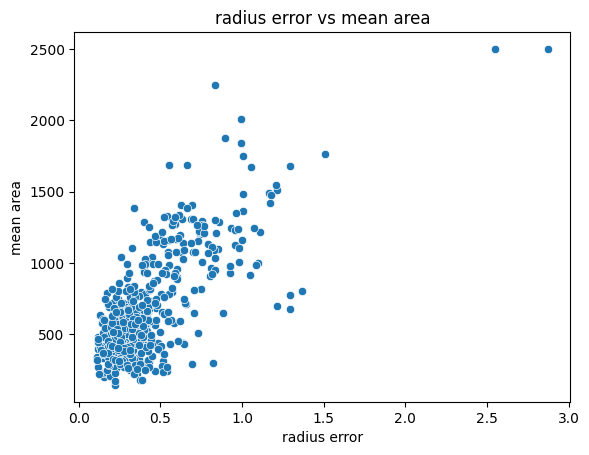

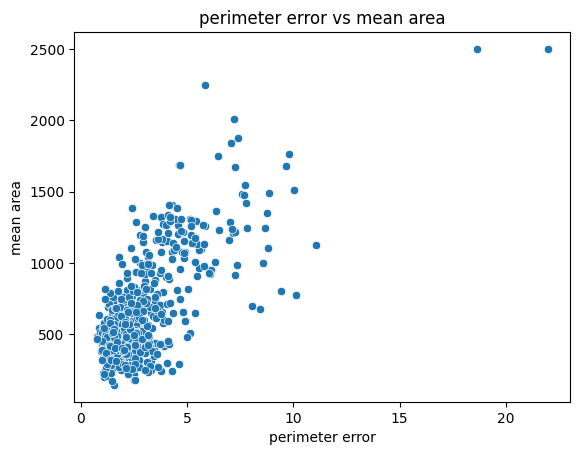

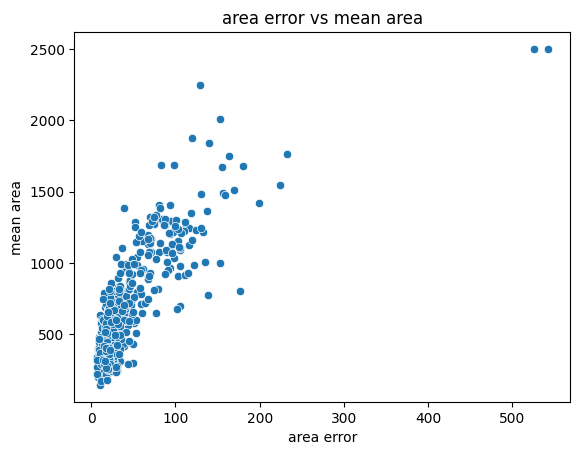

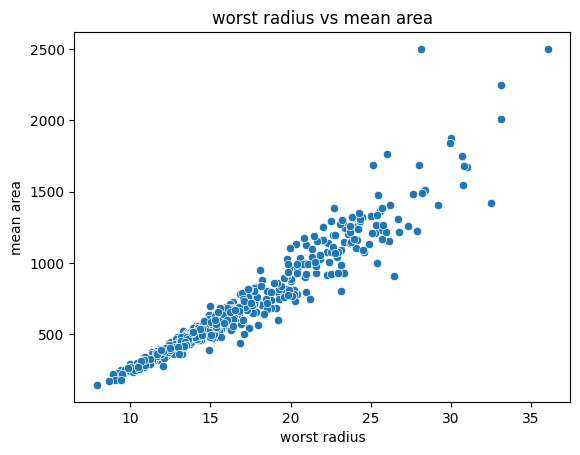

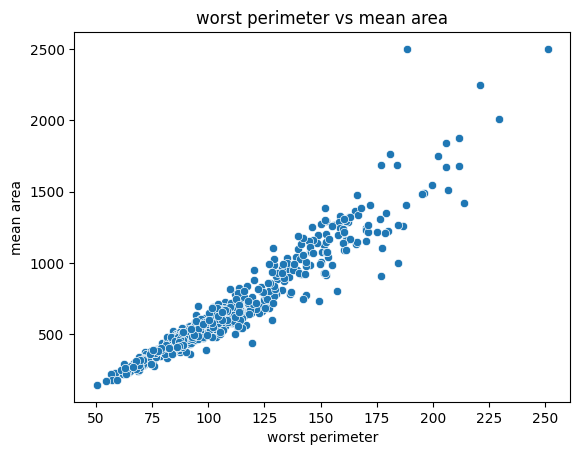

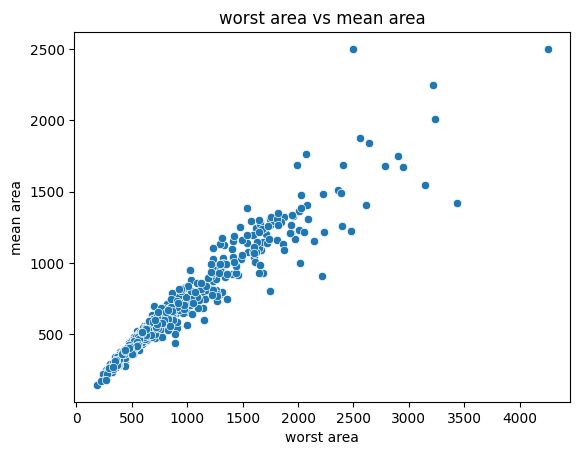

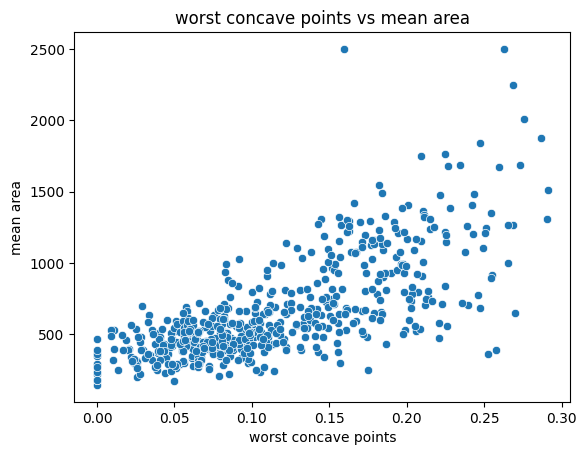

In [5]:
for feature in features_relevantes.index:
    sns.scatterplot(data=df, x=feature, y='mean area')
    plt.title(f'{feature} vs mean area')
    plt.show()

In [6]:
x = x[features_relevantes.index].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_seed)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_scaled = scaler.transform(x)
x_test_scaled = scaler.transform(x_test)

In [7]:
regression = LinearRegression()
regression.fit(x_train_scaled, y_train)

predictions = regression.predict(x_test_scaled)

r2 = r2_score(y_test, predictions)

print('R^2:', r2)

R^2: 0.9943180459483342


Média:  -1.6722996126089043 | Variancia:  658.1712515521161 
Assimetria:  -1.9880291455137726 | Curtose:  15.641823352243161


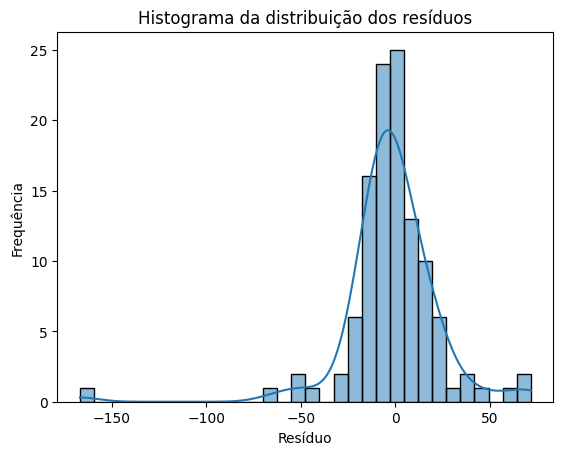

In [8]:
residuos = y_test - predictions
residuos = pd.Series(residuos)

print('Média: ', residuos.mean(), '| Variancia: ', residuos.var(), '\nAssimetria: ', residuos.skew(), '| Curtose: ', residuos.kurt())

sns.histplot(residuos, kde=True)
plt.title('Histograma da distribuição dos resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.show()